### Machine Learning Basics with the K-Nearest Neighbors Algorithm
![title](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems

- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
__“Birds of a feather flock together.”__

- KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

   <img src="python_ds.jpg" alt="drawing" style="width:490px;"/>


### What’s KNN?
- KNN (K — Nearest Neighbors) is one of many (supervised learning) algorithms used in data mining and machine learning, it’s a __classifier algorithm where the learning is based “how similar” is a data (a vector) from other .__

![title](https://cdn-images-1.medium.com/max/1200/1*3-NZnN68PNp12y0Q9G0X6w.png)

### __‘k’__ in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.

__How shall I choose the value of k in KNN Algorithm?__
![title](https://cdn-images-1.medium.com/max/1600/0*kzsntHPVInqJghMs.gif)

__k’ in KNN algorithm is based on feature similarity choosing the right value of K is a process called parameter tuning and is important for better accuracy. Finding the value of k is not easy.__
Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the __case of a small number of neighbors__, __the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-poster')

In [2]:
dfx=pd.read_csv(r"C:\Users\lmd\Documents\Data-Science\machine-learning-online-2018-master\machine-learning-online-2018-master\Datasets\xdata.csv")
dfy=pd.read_csv(r"C:\Users\lmd\Documents\Data-Science\machine-learning-online-2018-master\machine-learning-online-2018-master\Datasets\ydata.csv")

In [3]:
X=dfx.values# first column of dataframe  contains the serial numbers that we not required so we need to drop that
Y=dfy.values
print(X.shape)
print(Y.shape)

(399, 3)
(399, 2)


In [4]:
X

array([[ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       [ 3.00000000e+00,  4.67701056e+00,  3.04724443e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [5]:
dfx[0:5]

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [6]:
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


In [7]:
    print(X[0:5])
    print(Y[0:5])

[[3.516279   3.71975047]
 [4.60649561 3.41437943]
 [4.67701056 3.04724443]
 [4.15772454 3.13867678]
 [3.15443087 3.61985805]]
[0. 0. 0. 0. 0.]


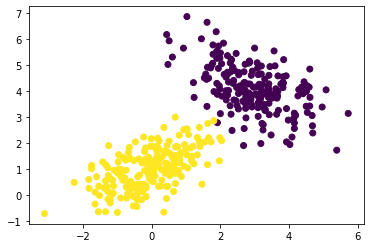

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y)

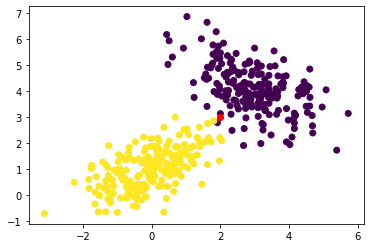

In [9]:
#Lets have a query point
query_x=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],c='red')
plt.show()

__To determine which of the K instances in the training dataset are most similar to a new input__ a distance measure is used. For real-valued input variables, the most popular distance measure is __Euclidean distance__.

- __Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.__

    - __EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )__

- The value for K can be found by __algorithm tuning__. It is a good idea to try many different values for K (e.g. values from 1 to 21) and see what works best for your problem.

In [10]:
def euclid_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_point,k=5):
    
    dist_values=[]
    m=X.shape[0]
    
    for i in range(m):
        d=euclid_dist(query_point,X[i])
        dist_values.append((d,Y[i]))#(distance,label)
#     print(dist_values[0:5])
    dist_values=sorted(dist_values)
    #Nearest /First K points
    dist_values=dist_values[:k]
#     print(dist_values)
    vals=np.array(dist_values)
#     print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals[0][new_vals[1].argmax()]) #new_vals[1].argmax() will give the index of maximum frquency oflabel 
    


In [11]:
knn(X,Y,query_x,k=5)

0.0


## Recognising Handwritten Digits on MNIST Dataset using KNN

In [12]:
df=pd.read_csv(r"C:\Users\lmd\Documents\Data-Science\machine-learning-online-2018-master\machine-learning-online-2018-master\Datasets\MNIST-2\mnist_train.csv")

In [13]:
print(df.shape) #Each image is 28*28=784 pixel
print(df.columns)

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [14]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [16]:
X=data[:,1:]
Y=data[:,0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [17]:
## Can also use scikit split method
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2)

In [19]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


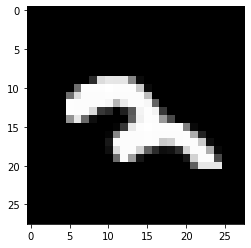

2


In [20]:
# Visualise Some Samples

def drawImg(sample):
    img=sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(X_train[785])
print(Y_train[785])

## Step2: Knn

In [21]:
def euclid_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_point,k=5):
    
    dist_values=[]
    m=X.shape[0]
    
    for i in range(m):
        d=euclid_dist(query_point,X[i])
        dist_values.append((d,Y[i]))#(distance,label)
#     print(dist_values[0:5])
    dist_values=sorted(dist_values)
    #Nearest /First K points
    dist_values=dist_values[:k]
#     print(dist_values)
    vals=np.array(dist_values)
#     print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals[0][new_vals[1].argmax()]) #new_vals[1].argmax() will give the index of maximum frquency oflabel 
    


## Step3: Make Predictions

In [22]:
knn(X_train,Y_train,X_test[78])

2.0


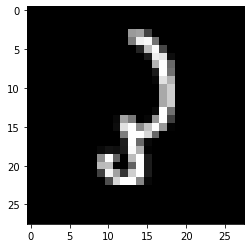

In [23]:
drawImg(X_test[78])

##### It is worth noting that the minimal training phase of KNN comes both at a memory cost, since we must store a potentially huge data set, as well as a computational cost during test time since classifying a given observation requires a run down of the whole data set. Practically speaking, this is undesirable since we usually want fast responses.

 __Minimal training but expensive testing.__

### Does the k in kNN usually (or must be) an odd number? Or it depends on the number of classes?

Let's think for a while: The k, in the KNN algorithm, represent the number of closest neighbors that you are comparing, right? So, no matter if you have 2 or n classes, if you __choose an even k__, there is a __risk of a tie__ in the decision of which class you should set a new instance. This is why the k is usually odd - no ties.